<img src="../NAWI_Graz_Logo.png" align="right" width=150>

# Notebook 2: For-loops and conditional statements

*Developed by Raoul Collenteur and Johannes Haas, Institute of Earth Sciences, NAWI Graz Geocenter, University of Graz.*

### Content of this lecture
- repetition of previous lecture
- basics of accessing and slicing data
- working with for loops
- conditional statements
- three exercises

**Some tips/reminders for working in a notebook:**

- shift-enter to run a code-block
- shift-tab to get quick information on a function
- tab after a dot (`.`) to find methods

In [1]:
# Import the python packages needed in this session
import numpy as np
import pandas as pd

# 1. Repeating last week

### 1a. Data types

In [3]:
a = 1
b = 2.1
c = 'Hello'
d = [1, 2, 3, 4, 5]
e = {'var1':0.111, 'var2':0.222, 'var3':0.333}
f = (1, 2, 3) # What is this?
type(f)

tuple

In [6]:
f[0] = 2

TypeError: 'tuple' object does not support item assignment

In [8]:
# Accessing data in a dictionary
e["var1"]

0.111

In [7]:
# Accessing data in a list
d[0]

1

### 1b. Basic Mathematical operators

- addition: `+`
- subtraction: `-`
- division: `/`
- multiplication: `*`
- power: `**`

Some other usefull functions enclosed in the Numpy package:
- root: `np.sqrt`
- sine: `np.sine`
- cosine: `np.cos`
- pi: `np.pi`

In [15]:
# Play around with some mathematical operaton
np.pi

3.141592653589793

### 1c. Plotting your data
One of the most important things to do in Python is to visualize the results of your analysis. `Matplotlib` is the standard plotting package for Python,and most of the methods we will use are in the sub-package `pyplot`. Have look at the website of Matplotlib to see what you can do with this package: [Matplotlib website](https://matplotlib.org).

Let's import the package and give it the alias `plt`. 

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

### Creating a simple plot
Let's make a plot of the growth of bacteria over time. We assume that the growth occurs exponentially with the formula $y = b + exp(a*t)$ where $b$ is the initial number of bacteria, $a$ a parameter and $t$ the time.

In [23]:
len(np.arange(0, 12, 2))

6

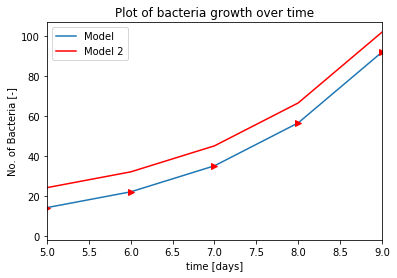

In [35]:
x = np.arange(0, 10)
a = 0.5
b = 2.0
y = b + np.exp(a*x)

# Plot x against y
plt.plot(x, y)
plt.plot(x, y+10, color="r")

plt.plot(x, y, marker='>', color="r", linestyle=" ")

plt.xlabel("time [days]")
plt.ylabel('No. of Bacteria [-]')
plt.legend(["Model", "Model 2"])
plt.xlim(5,9)
plt.title("Plot of bacteria growth over time");
plt.savefig("figure.png")

# 2. Accessing and slicing data in lists and 1-D numpy arrays
Often we want to store individual values in variables that contain a collection of these values, e.g., a list or dictionary. These variables with multiple data points are also called `iterables` in Python, as we can iterate over them. We will do that in a bit, but let us first understand how we can access the data in lists and dictionaries.

The common method to select a single value in an iterable is by typing the variables name, followed by square brackets with a number (e.g., `thisisalist[0]`). The Python language is zero based. That means that to get the first item in a list or array, a zero is used (e.g., `thisisalist[0]` will return the first item in the list).

In [39]:
numbers =  [1,2,3,4,5]
print("The length of the list numbers is:", len(numbers))
print("The first item in the numbers list is: ", numbers[0])

The length of the list numbers is: 5
The first item in the numbers list is:  1


In [37]:
# Select the first three values in the list
numbers[0:3]

[1, 2, 3]

In [38]:
# Select the last item in the list
numbers[-2]

4

The above statements showed different statements to select data. The statement `number[0:3]` tells Python to select the items 0 to 3 (but not including 3). The statement -1 will return the last item of the last, as -2 will for example return the second last item of the list. The basic pattern to access a single value or a slice of the data is: `thisisalist[first:last:step]`. Can you figure out what the next code-block returns without running it?

In [40]:
numbers[-1:2:-1]

[5, 4]

### 1-D Numpy arrays
Accessing data in one dimensional Numpy arrays is completely similar to accessing data in a list. The difference is, is that it will return a Numpy array.

In [42]:
x = np.array(numbers)
x[-1:2:-1]

s = "12345"
s[0]

'1'

# 2. Introducing For-loops
Often you have to perform repetitive tasks in programming. For example, you want to repeate a piece of code printing a number in a list.

In [44]:
numbers =  [1,2,3,4,5]

for item in numbers:
    # Execute this code in the for-loop
    print("the number is", item)
    
# We are done
print("We are done!")

the number is 1
the number is 2
the number is 3
the number is 4
the number is 5
We are done!


In [47]:
for i in range(10):
    print("i is this number", i)

i is this number 0
i is this number 1
i is this number 2
i is this number 3
i is this number 4
i is this number 5
i is this number 6
i is this number 7
i is this number 8
i is this number 9


So what happened here? We first defined a variable named numbers with the values 1 through 5 in it. Then, the for-loop is started. Python will loop through all items in the list `numbers`, and execute the code in the indented part. That is, the lines after the semi-colon (`:`) that are indented by 4 spaces. Python will continue after it has looped through all values (1 to 5) and continue down the lines. No stop statement is needed, just stop indentating.

Often, we want to loop over a range of numbers, and use those number to select an item in a list. To generate a list of number to loop through  Python has the built-in method `range`, which will return a iterable of `n` integers. 


In [52]:
names = ["piet", "jan", "anna", "pim", "esther", "julia"] # Let's try some common Dutch names
for i in range(len(names)):
    print("the item", i, "is name", names[i])    

the item 0 is name piet
the item 1 is name jan
the item 2 is name anna
the item 3 is name pim
the item 4 is name esther
the item 5 is name julia


### Calculate the sum with a for loop
The code that is executed each time in the for-loop can be as complicated and long as you want. We can also perform calculations in this code, for example to calculate the sum of the numbers in a list. The formula for the mean $\mu$ of $x$ is pretty simple:

$\mu(x) = \frac{\sum(x)}{N}$

where $N$ is the number of elements in x. Let's see how we can program this formula in Python using the for-loop we just learned.

In [60]:
x = np.arange(0, 10)

sum_x = 0

for i in x:
    sum_x = sum_x + i
    # print(sum_x)
    
print("The sum we calculated is:", sum_x)
print("The actual sum is", np.sum(x)) # Python has a built-in some function

print("The mean we calculated is", sum_x / len(x))
print("The actual mean is", np.mean(x))

The sum we calculated is: 45
The actual sum is 45
The mean we calculated is 4.5
The actual mean is 4.5


Loops are a very powerfull tool in our toolbox and can be used for many things. For more information on the use of loops please have a look at [this website](https://www.tutorialspoint.com/python/python_loops.htm).

# 3. Conditional statements
It is a common operation to check if a value is equal to, larger or smaller than another value. For example, if a certain condition is True, you want to execute a piece of code. These type of statements are called "conditional" statements, as it depends on the the condition being `True` or `False` for some code to be executed or not. Let's start with a simple example:

In [69]:
a = "abc"

if a == "a":
    print("a is indeed equal to a")

In [70]:
a == "abc"

True

In [71]:
a = "a"
b = "b"

if a == b:
    # Code to execute if statement is True
    print("a is indeed equal to a")
else:
    # Code to execute if statement is False
    print("a is not equal to b")

a is not equal to b


The code above is a type example of checking a condition statement (a equals b) and executing different types of code depending on the outcome. When the statement `a == b` returns `True`, the code following the semi-colon (`:`) is executed (indeed, again indented by four spaces or a tab). If `False`, Python continues down the lines and, in this case, finds an `else:` statement. This means that if the above condition is `False`, the indented code after the else statement is executed.

Other comparison operators are:

- equals: `==`
- not equal: `!=`
- larger than: `>`
- smaller than: `>`
- greater than or equal to: `>=`
- smaller than or equal to: `<=`


In [81]:
x = 3
y = 10
z = 1

x == y

False

In [82]:
x >= y

False

In [83]:
if x == y:
    print("x is equal to y")
# We can check multiple conditions using an if/elif/else statement
elif x < z:
    print(" is smaller than z")
else:
    print("x is between y and z")

x is between y and z


### if/elif/else
In the above code block you can see how you can check multiple conditional statements using the if/elif/else format. You can put in as many elif-statements as you want, for example to compare a value to multiple values one-by one. 

### Combining statements
It is also possible to combine conditional statements, as is shown below. The statement are put in between round brackets (e.g., `(a == b)`) and are combined with the `&` sign. Other combinations are possible (e.g., `or`, `and`, `and not`) but are outside the scope of this lecture. [Here](https://www.tutorialspoint.com/python/python_basic_operators.htm) you can find an overview of the basic operators and what you can do with them.

In [ ]:
if (x < y) & (x > z):
    print("x is between y and z")

In [87]:
(x < y) & (x > y)

False

# Exercise 1. Calculate the standard deviation with a for loop
In this exercise we are going calculate the sum and the mean of some numbers in a list using a simple formula. 

We will programm the following formula for the calculation of the standard deviation $\sigma$:

$\sigma = \sqrt\frac{\sum(x_i-\mu)^2}{N}$

where $x_i$ are the individual values in the series $x$, $\mu$ is the mean value of $x$, and &\$N$ is the number of values in $x$. perform the following steps:

- Create a array with random numbers (`np.random.rand`) and subtract 0.5 from each value;
- Use a for-loop to calculate the mean of x;
- Then, use a for-loop to implement the above formula;
- Check your answer by calling NumPy's `std` method.

## Exercise 2. Count the number of letters
In this exercise we are going to do some data mining on a piece of text. The goal is to count the number of letters "a", "k" and "y" in the piece of text shown below. It is your task to write a for loop that counts the number of time the letters a, k, and y are present in the text below. Print the answer to the screen for each of the three letters.

**Hint**: you will have to use three conditional statements and a if/elif/elif format to check if a letter is one of the three letters we are interested in.

In [ ]:
# multiline string, copied from https://en.wikipedia.org/wiki/Python_(programming_language)

text = """Python is an interpreted, high-level, general-purpose programming language. Created by Guido van Rossum
and first released in 1991, Python has a design philosophy that emphasizes code readability, notably using 
significant whitespace. It provides constructs that enable clear programming on both small and large scales.
[26] Van Rossum led the language community until stepping down as leader in July 2018.[27][28] Python features 
a dynamic type system and automatic memory management. It supports multiple programming paradigms, including 
object-oriented, imperative, functional and procedural. It also has a comprehensive standard library.[29]
Python interpreters are available for many operating systems. CPython, the reference implementation of Python, 
is open source software[30] and has a community-based development model, as do nearly all of Python's other 
implementations. Python and CPython are managed by the non-profit Python Software Foundation.""" 

## Exercise 3. Make a plot of the sine and cosine curves
In this exercise we will plot a sine and a cosine curve. The following formulas are to be plotted:

$y1 (x) = 2 * \sin(x)$

$y2 (x) = \cos (2.5x) $

Perform the following tasks:

1. Calculate y values for x in the range of 0 to $6\pi$ with steps of 0.1;
2. Plot the two curves in one graph;
3. Put all the elements (e.g., the x label) in the graph to make it publication ready.

### Bonus: Find the intersections between two lines and plot them
Use a for-loop to find the approximate intersections between the two curves and use red markers to plot these points. Use a different of 0.1 between the values of y1 and y2 to find the points. You can use if/else statements to plot the marker right in the for-loop!